<a href="https://colab.research.google.com/github/Colsai/DATA-690-WANG/blob/master/individual_project_states_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#I'm doing this through Colab (Mounting Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 


def warn_off():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

warn_off()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: deprecated
  # This is added back by InteractiveShellApp.init_path()


In [4]:
states_df = pd.read_csv("/content/drive/My Drive/archive/states_all.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
states_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


Text(0, 0.5, 'Total Expenditure/Enrollment')

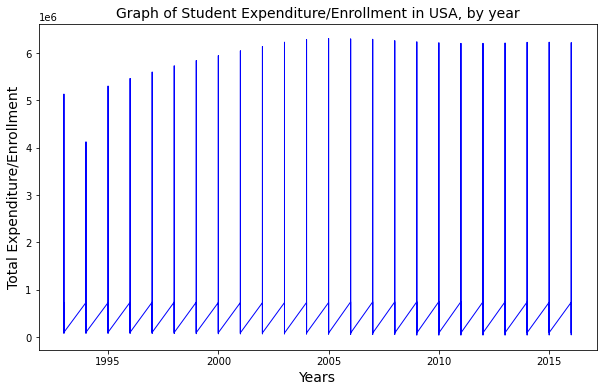

In [28]:
#Showing Progression of funding over years (USA), adjusted for average inflationyear = states_df['YEAR']
enroll = states_df['ENROLL']

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(year, enroll, 'blue', linewidth=1, markersize= 12)

ax.set_title("Graph of Student Expenditure/Enrollment in USA, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure/Enrollment')

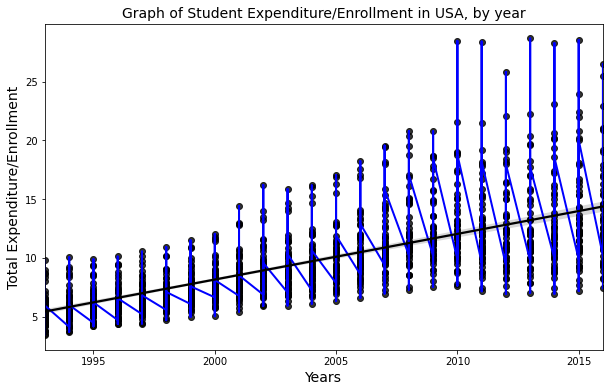

In [18]:
#Showing Progression of funding over years (USA), adjusted for average inflation

year = states_df['YEAR']
enroll = states_df['ENROLL']
total_exp = states_df['TOTAL_EXPENDITURE']
inflation = .0322

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(year, (total_exp/enroll)*(1-inflation), 'blue', linewidth=2, markersize= 12)
sns.regplot(year, (total_exp/enroll)*(1-inflation), color='black')

plt.xscale('linear')

ax.set_title("Graph of Student Expenditure/Enrollment in USA, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)

In [7]:
def state_finder(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia
    return find_it

In [8]:
md_df = state_finder(states_df, "STATE", "maryland", False)

In [9]:
md_df.head(15)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
20,1992_MARYLAND,MARYLAND,1992,NaN,4658498.0,228336.0,1778834.0,2651328.0,4698374.0,2628891.0,1461083.0,NaN,340298.0,16081.0,59641.0,60287.0,52815.0,40426.0,NaN,NaN,751850.0,217.0,265.0,211.0,NaN
71,1993_MARYLAND,MARYLAND,1993,751850.0,4918010.0,252211.0,1940713.0,2725086.0,4898895.0,2785206.0,1508203.0,224147.0,324925.0,17984.0,60378.0,61199.0,55285.0,40661.0,NaN,NaN,772638.0,NaN,NaN,NaN,NaN
122,1994_MARYLAND,MARYLAND,1994,772638.0,5141505.0,258611.0,2002382.0,2880512.0,5187683.0,2812922.0,1673254.0,254041.0,387699.0,18834.0,62341.0,61982.0,57222.0,43223.0,NaN,NaN,790938.0,NaN,NaN,210.0,NaN
173,1995_MARYLAND,MARYLAND,1995,790938.0,5580123.0,270249.0,2059219.0,3250655.0,5610071.0,3064702.0,1768323.0,253194.0,458731.0,19092.0,63232.0,62207.0,58835.0,42974.0,NaN,NaN,805544.0,NaN,NaN,NaN,NaN
224,1996_MARYLAND,MARYLAND,1996,805544.0,5688918.0,271806.0,2163187.0,3253925.0,5825606.0,3197895.0,1856055.0,251330.0,449601.0,19639.0,61856.0,63693.0,59236.0,44232.0,NaN,NaN,818583.0,NaN,NaN,NaN,NaN
275,1997_MARYLAND,MARYLAND,1997,818583.0,6040883.0,292260.0,2343928.0,3404695.0,6217120.0,3359984.0,1893583.0,289761.0,592725.0,19739.0,60385.0,64763.0,60010.0,46532.0,514894.0,221995.0,830744.0,NaN,NaN,NaN,NaN
326,1998_MARYLAND,MARYLAND,1998,830744.0,6521269.0,325321.0,2514101.0,3681847.0,6519389.0,3584678.0,1902782.0,302974.0,558202.0,20013.0,57813.0,67230.0,62174.0,49321.0,525146.0,231534.0,841671.0,NaN,NaN,212.0,261.0
377,1999_MARYLAND,MARYLAND,1999,841671.0,6850334.0,372016.0,2686695.0,3791623.0,6892276.0,3660046.0,2096627.0,304175.0,608284.0,19285.0,56942.0,69077.0,62776.0,50632.0,527889.0,236400.0,846582.0,NaN,NaN,NaN,NaN
428,2000_MARYLAND,MARYLAND,2000,846582.0,7419047.0,409021.0,2804218.0,4205808.0,7355698.0,3874590.0,2189499.0,300044.0,760810.0,20031.0,56073.0,69279.0,64647.0,50962.0,530097.0,240843.0,852920.0,222.0,272.0,NaN,NaN
479,2001_MARYLAND,MARYLAND,2001,852920.0,7864290.0,467001.0,2928704.0,4468585.0,7981362.0,4172982.0,2366854.0,369293.0,813068.0,20314.0,56384.0,67448.0,66211.0,52671.0,531432.0,246807.0,860640.0,NaN,NaN,NaN,NaN


In [10]:
md_df = md_df.drop("PRIMARY_KEY", axis=1)
md_df = md_df.sort_values(by="YEAR")

In [11]:
md_df.columns

Index(['STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G',
       'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
       'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure/Enrollment')

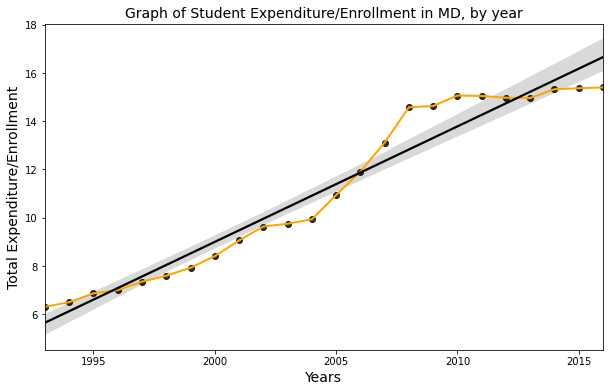

In [12]:
#Showing Progression of funding over years, adjusted for average inflation

year = md_df['YEAR']
enroll = md_df['ENROLL']
total_exp = md_df['TOTAL_EXPENDITURE']
inflation = .0322

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(year, (total_exp/enroll)*(1-inflation), 'orange', linewidth=2, markersize= 12)
sns.regplot(year, (total_exp/enroll)*(1-inflation), color='black')

plt.xscale('linear')

ax.set_title("Graph of Student Expenditure/Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)

In [13]:
#This is OK, but we should adjust for a few things. First, inflation.

#Adjust total expenditure as inflation


Text(0, 0.5, 'Total Student Enrollment')

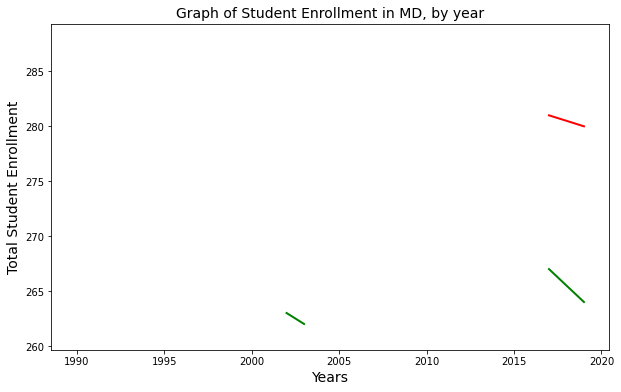

In [14]:
#Showing Progression of funding over years
x = md_df['YEAR']
avg_8_r = md_df['AVG_READING_8_SCORE']
avg_8_m = md_df['AVG_MATH_8_SCORE']

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x, avg_8_r, 'green', linewidth=2, markersize= 12)
ax.plot(x, avg_8_m, 'red', linewidth=2, markersize= 12)

plt.xscale('linear')

ax.set_title("Graph of Student Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Student Enrollment", color='black', size = 14)

In [15]:
#We want to look at total expenditure on school first
md_adj_increase = md_df['TOTAL_EXPENDITURE']

In [16]:
md_adj_increase

1415           NaN
1416           NaN
1417           NaN
1418           NaN
1419           NaN
1420           NaN
20       4698374.0
71       4898895.0
122      5187683.0
173      5610071.0
224      5825606.0
275      6217120.0
326      6519389.0
377      6892276.0
428      7355698.0
479      7981362.0
530      8568446.0
581      8732518.0
632      8921938.0
683      9782665.0
734     10585292.0
785     11541225.0
836     12739693.0
887     12757599.0
938     13205691.0
989     13247697.0
1040    13212140.0
1091    13284637.0
1142    13712839.0
1193    13882823.0
1244    13992191.0
1421           NaN
1683           NaN
Name: TOTAL_EXPENDITURE, dtype: float64